# Rent Amount Prediction

This is the first of many tutorials written based on data from KejaBot - A peer to peer house hunting platform. KejaBot is accessed through Chatyfy Android app ( http://bit.ly/Chatyfy ). Chatyfy is an app hosting several chatbots for consumer public use. 

The below exercise is to illustrate the need for mathematics when doing Machine Learning!

## Introduction 

Machine learning is about creating an algorithm that can learn from data in order to make a prediction.

The key mathematics required when doing Machine Learning are:
1. Statistics - This is the core of everything
2. Calculus - This will help us optimize the model that we are trying to build
3. Probability - This will help us predict the likelihood of an event occuring
4. Linear Algebra - This makes it feasible to run these algorithms in massive

## Where and How does the Mathematics come in? 

In Machine Learning, there are four Mathematical Topics that are crucial and i will explain how and where they are significant in each of them:

1. Statistics - This will help in deriving useful statistical inferences that describes the data. It is a tool that creates an understanding from a set of numbers. Statistical inference is the process of making a prediction about a larger population of data based on smaller sample i.e. What is it that we can infer about a population parameters based on a sample statistic. In the case of the house rental data above, can you tell the number of bedrooms of majority of the houses? Does this reflect the financial capability of the people in this estate? Can the statistical inference tell you anything about the kind of people living in that area?

2. Calculus - This is the study of change.


## Dataset

Sample dataset for this exercise which has been extracted from the app is available here

## Workbench

In [6]:
# Import the necessary libraries

#Standard Libraries
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# Display Images
from IPython.display import Image

In [2]:
#import the file
data_df = pd.read_csv("data/house_rent_by_number_of_rooms.csv", engine="python")
data_df.head(5)

,No. of Bedrooms,Monthly Rent (Kes)
0,1,15000
1,1,18000
2,3,32000
3,2,28000
4,2,22000


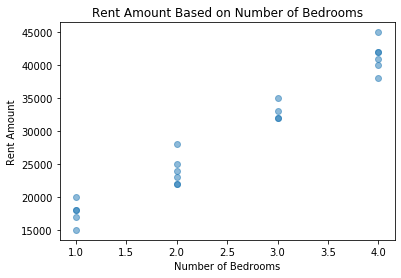

In [3]:
#create a scatter plot
x = data_df['No. of Bedrooms']
y = data_df['Monthly Rent (Kes)']

plt.scatter(x, y, alpha=0.5)
plt.title('Rent Amount Based on Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent Amount')
plt.show()

## Observations

There seem to be a certain linear relationship between the rent paid and the number of bedrooms for the house :-)

If one was to draw a line of best fit, what would guide their decision in order to attain the most accurate prediction? The statistical inference technical to model this kind of relationship is called **Linear Regression**

### Linear Regression 

Linear regression ( **y = mx + b** ) is a statistical inference technic that allows us to summarize and study the relationship between two variables i.e. Number of Bedrooms and Rent Amount

#### Definitions

1. **Independent Variables** - x which is the input
2. **Dependent Variable** - y which is also the prediction. At times this is also known as the target variable.
3. **Constant** - b is the point where the line intercepts the y-axis
4. **Slope** - m is the slope of the line

If we have the values of **m** and **b** then we would have a full equation to be able to predict the y value which in this case is the rent amount.

A question like what is the probable rent amount for a 5 bedroom house?

To solve this question we shall need to derive the values of m and b and use the equation to get the value of y.

So the big question is **How do we get these variables?**


#### Getting the values

From the graph above, one can draw so many lines of best fit in order to be able to make a prediction. However, how will one know which line is to be used to make the prediction.

In order to get the values, i will use an assumption using hypothetical values of **m** and **x** i.e assuming there exists a relationship between rent amount (RA) and number of bedrooms (NoB).

To be able to solve this, we assume two lines were drawn and from the two lines, we got the relationships as:

- Line one is derived using the formula =====> RA = 18600.5 + 6100 * NoB
- Line two is derived using the formula =====> RA = 12100.2 + 7100 * NoB

**Notations**
-  Let $y_{i}$ denote the **observed response** for the $i^{th}$ experimental unit
-  Let $x_{i}$ denote the **predictor value** for the $i^{th}$ experimental unit
-  Let $\widehat{y}$ denote the **predicted response** (or **fitted value**) for the $i^{th}$ experimental unit

If we use the lines to predict the rent for a four bedroom house then $x_{i}$ = 4 and $y_{i}$ = 40000

- **Using Line one to do the predictions** ==> $y_{i}$ = 18600.5 + 6100(4) = 43000
- **Using LIne two to do the predictions** ==> $y_{i}$ = 12100.2 + 7100(4) = 40500

As expected the estimated line one does not predict the rent amount perfectly. In this case the prediction is 43000 which is far from the 40000. So there is an error in the prediction and thus we make a prediction error denoted by $e_{i}$ = $y_{i}$ - $\widehat{y}$ 

A line that would fit the line very well is one that has as small as possible error in the overall sense. Unfortunately just from the few values of x we cannot conclude that line two is the best until we get the sum of the errors found on all the points.

### Statistics

#### Least Square Error Function 

Least squares error function tells us that in order to derive the line of best fit, we need to choose the values of **m and b** that minimizes the sum of the squared prediction errors. In the coming sections below, we shall tabulate the errors for each of the points and do the summation, the line with the least error shall be picked as the one having the line of best fit.

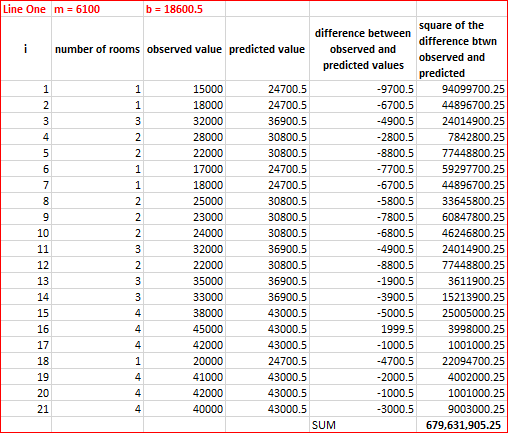

In [7]:
#Display the sum of errors for line one
Image(filename="images/house_rent_by_number_of_room_line_one.png")

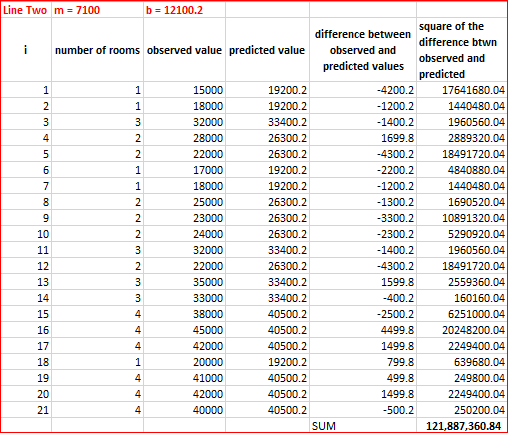

In [8]:
#Display the sum of errors for line two
Image(filename="images/house_rent_by_number_of_room_line_two.png")

#### Conclusion

By looking at the sum total of the square of the difference(the last column) and comparing the value for both lines, we can tell that line two is optimal. Drawing several lines and computing the total sum of the squared errors would give us the most optimal line of best fit.

So if we draw several lines and repeat the above exercise, we shall get values of m and b that will give us the very minimum sum of squared error and thus the formulae for Least Squares Error Function is 

![title](images/least_squares_error_function.png)

The error function tells us how far off the predicted value is from the observed value. There are so many statistical error functions out there that would help us calulate these differences. Least Squares error function is a simple one.

If we try to derive every single possible combination of the error function, we will have to add a z-axis so as to look at it from a three dimensional perspective and the image would look like

![title](images/three_dimension_look_at_error_function.png)

The smallest error value would exists at the bottom of the bowl and that data point would be our ideal value for m and b that we will replace in the linear funtion **y = mx + b** and it would give us the line of best fit but how do we actually derive these points. We cannot possibly manually calculate and derive the data point that will give us the optimal values of m and b so we will use Calculus to get to this point.

### Calculus

Calculus in this context is the study of change and the optimization technique known as gradient descent that will help us discover the minimum value iteratively. The function is as depicted in the image:

![title](images/gradient_descent_iteration.png)

Gradient descent will use the error of a given data point to compute the gradient of our unknown variable and we then use the gradient to update the two variables then we move on to the next data point and repeat the process over and over again slowly like a bowl rowling down a hill until we find what out minimum value is.

Calculus helps us find the direction of change i.e. in what direction should we change the unknown variable m and b in our function such that it's prediction is more optimal i.e. where the error is smallest.

Interestingly the house rent of any given house does not depend only on the number of bedrooms. The rent could depend on price per square foot, number of bathrooms, average rent of houses within the area and so much variables.If we factor in all the features affecting the rent amount for any given house, then the regression line would change to a **Multivariate Regression** which would look like:

![title](images/multivariate_regression_formulae.png)

### Linear Algebra 

This is the branch of Math that is concerned with the study of Multivariate spaces and the linear transformation between these multivariate spaces.

It gives us a set of operations that we can perform on groups of numbers known as Matrices. Our training set now becomes an M x I matrix of M samples that have I features. Instead of a single variable with a weight, each of the features have a weight as depicted in the image below:

!